## Predictive Analysis for Optimizing Kalamansi Growth using Logistic Regression
Logistic regression is a classification method ideally suited to predict binary outcomes – in this case, whether a kalamansi has infected to a disease or not. Unlike linear regression, which focuses on continuous variables, logistic regression excels at modeling categorical outcomes. Using logistic regression, we can harness a range of factors to improve our understanding of kalamansi cultivation.

### Agenda
* About Dataset
* Loading Libraries
* Loading Data
* Understanding Data
* Exploratory Data Analysis
* Splitting the data
* Building Model
* Prediction
* Model Performance

### About Dataset 
#### Kalamansi Quality
The dataset of kalamansi disease has 11 columns -  leaf_spots, wilting, discoloration, lesion, fertilized, watering_sched, pruning, pesticide_use, pest_prescence, and disease. If disease = 1, the kalamansi is infected with disease and if disease = 0, the kalamansi has not been indected with disease.

### Loading Libraries

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

### Loading Data

In [35]:
url = 'C:/Users/Benneth/Documents/Jupyter/kalamansi-disease-dataset.csv'
kalamansi= pd.read_csv(url, header = 0, index_col = 0)

### Understanding Data
Let's check how our data looks. This can be done using head() method, displaying only 5 data.

In [36]:
kalamansi.head()

,leaf_spots,wilting,discoloration,lesions,fertilized,watering_sched,pruning,pesticide_use,pest_presence,disease
kalamansi_id,,,,,,,,,,
0,Absent,Absent,Absent,Absent,No,Regular,Never,Nothing,Absent,0
1,Mild,Absent,Present,Absent,Yes,Irregular,Occasional,Fungicide,Present,1
2,Moderate,Moderate,Absent,Absent,Yes,Regular,Never,Insecticide,Present,1
3,Absent,Absent,Absent,Absent,No,Irregular,Regular,Nothing,Absent,0
4,Mild,Absent,Present,Absent,Yes,Regular,Never,Nothing,Present,1


There are 11 columns in total:
Independent variables (Predictors):
* kalamansi_id - refers to unique id of each kalamansi
* leaf_spots - absent, mild, moderate, severe (Ordinal)
* wilting - absent, slight, moderate, severe
* discoloration - absent or present
* lesions - absent or present
* fertilized - fertilized or not fertilized (yes/no)
* watering_sched - regular or irregular
* pruning - none, occasional, regular, frequent
* pesticide_use - none, fungicide, insecticide
* pest_presence - absent or present

Dependent variable:
* disease - 1 (infected) or 0 (not infected)

#### Converting all columns to numerical value

In [37]:
#First, let's convert all the binary variables 
discoloration_mapping = {'Absent': 0, 'Present': 1}
lesions_mapping = {'Absent': 0, 'Present': 1}
fertilized_mapping = {'No': 0, 'Yes': 1}
watering_mapping = {'Irregular': 0, 'Regular': 1}
pest_mapping = {'Absent': 0, 'Present': 1}

# Apply mappings using lambda functions
kalamansi['discolor'] = kalamansi['discoloration'].apply(lambda x: discoloration_mapping[x])
kalamansi['lesion'] = kalamansi['lesions'].apply(lambda x: lesions_mapping[x])
kalamansi['fertilizer'] = kalamansi['fertilized'].apply(lambda x: fertilized_mapping[x])
kalamansi['water_sched'] = kalamansi['watering_sched'].apply(lambda x: watering_mapping[x])
kalamansi['pest'] = kalamansi['pest_presence'].apply(lambda x: pest_mapping[x])

In [38]:
kalamansi.head()

,leaf_spots,wilting,discoloration,lesions,fertilized,watering_sched,pruning,pesticide_use,pest_presence,disease,discolor,lesion,fertilizer,water_sched,pest
kalamansi_id,,,,,,,,,,,,,,,
0,Absent,Absent,Absent,Absent,No,Regular,Never,Nothing,Absent,0,0,0,0,1,0
1,Mild,Absent,Present,Absent,Yes,Irregular,Occasional,Fungicide,Present,1,1,0,1,0,1
2,Moderate,Moderate,Absent,Absent,Yes,Regular,Never,Insecticide,Present,1,0,0,1,1,1
3,Absent,Absent,Absent,Absent,No,Irregular,Regular,Nothing,Absent,0,0,0,0,0,0
4,Mild,Absent,Present,Absent,Yes,Regular,Never,Nothing,Present,1,1,0,1,1,1


In [39]:
#Drop all the categorical binary columns

binary_columns = ['discoloration','lesions', 'fertilized', 'watering_sched', 'pest_presence']
kalamansi = kalamansi.drop(binary_columns, axis=1)

In [40]:
kalamansi.head()

,leaf_spots,wilting,pruning,pesticide_use,disease,discolor,lesion,fertilizer,water_sched,pest
kalamansi_id,,,,,,,,,,
0,Absent,Absent,Never,Nothing,0,0,0,0,1,0
1,Mild,Absent,Occasional,Fungicide,1,1,0,1,0,1
2,Moderate,Moderate,Never,Insecticide,1,0,0,1,1,1
3,Absent,Absent,Regular,Nothing,0,0,0,0,0,0
4,Mild,Absent,Never,Nothing,1,1,0,1,1,1


In [41]:
#Lastly, convert all the columns that have multiple variables

leaf_mapping = {'Absent': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
wilt_mapping = {'Absent': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
pruning_mapping = {'Never': 0, 'Occasional': 1, 'Regular': 2, 'Frequent': 3}
pesticide_mapping = {'Nothing': 0, 'Fungicide': 1, 'Insecticide': 2}

# Apply mappings using lambda functions
kalamansi['leaf_spot'] = kalamansi['leaf_spots'].apply(lambda x: leaf_mapping[x])
kalamansi['leaf_wilting'] = kalamansi['wilting'].apply(lambda x: wilt_mapping[x])
kalamansi['tree_pruning'] = kalamansi['pruning'].apply(lambda x: pruning_mapping[x])
kalamansi['pesticide'] = kalamansi['pesticide_use'].apply(lambda x: pesticide_mapping[x])

In [42]:
kalamansi.head()

,leaf_spots,wilting,pruning,pesticide_use,disease,discolor,lesion,fertilizer,water_sched,pest,leaf_spot,leaf_wilting,tree_pruning,pesticide
kalamansi_id,,,,,,,,,,,,,,
0,Absent,Absent,Never,Nothing,0,0,0,0,1,0,0,0,0,0
1,Mild,Absent,Occasional,Fungicide,1,1,0,1,0,1,1,0,1,1
2,Moderate,Moderate,Never,Insecticide,1,0,0,1,1,1,2,2,0,2
3,Absent,Absent,Regular,Nothing,0,0,0,0,0,0,0,0,2,0
4,Mild,Absent,Never,Nothing,1,1,0,1,1,1,1,0,0,0


In [43]:
#Drop all the multiple values columns

multiple_columns = ['leaf_spots', 'wilting', 'pruning', 'pesticide_use']
kalamansi = kalamansi.drop(multiple_columns, axis=1)

In [44]:
kalamansi.head()

,disease,discolor,lesion,fertilizer,water_sched,pest,leaf_spot,leaf_wilting,tree_pruning,pesticide
kalamansi_id,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,1,1,0,1,1
2,1,0,0,1,1,1,2,2,0,2
3,0,0,0,0,0,0,0,0,2,0
4,1,1,0,1,1,1,1,0,0,0


In [45]:
#Stats: total count, mean, standard deviation, minimum, percentile 25, 50, 75, and maximum
kalamansi.describe()

,disease,discolor,lesion,fertilizer,water_sched,pest,leaf_spot,leaf_wilting,tree_pruning,pesticide
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.540000,0.540000,0.180000,0.480000,0.480000,0.540000,1.160000,0.90000,0.780000,0.600000
std,0.503457,0.503457,0.388088,0.504672,0.504672,0.503457,1.075895,1.19949,1.035887,0.832993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,3.000000,2.000000


#### Check for missing values

In [47]:
kalamansi.isnull().sum()

disease         0
discolor        0
lesion          0
fertilizer      0
water_sched     0
pest            0
leaf_spot       0
leaf_wilting    0
tree_pruning    0
pesticide       0
dtype: int64

### Exploratory Data Analysis
Univariate Analysis using Bar Chart (Frequency Distribution)

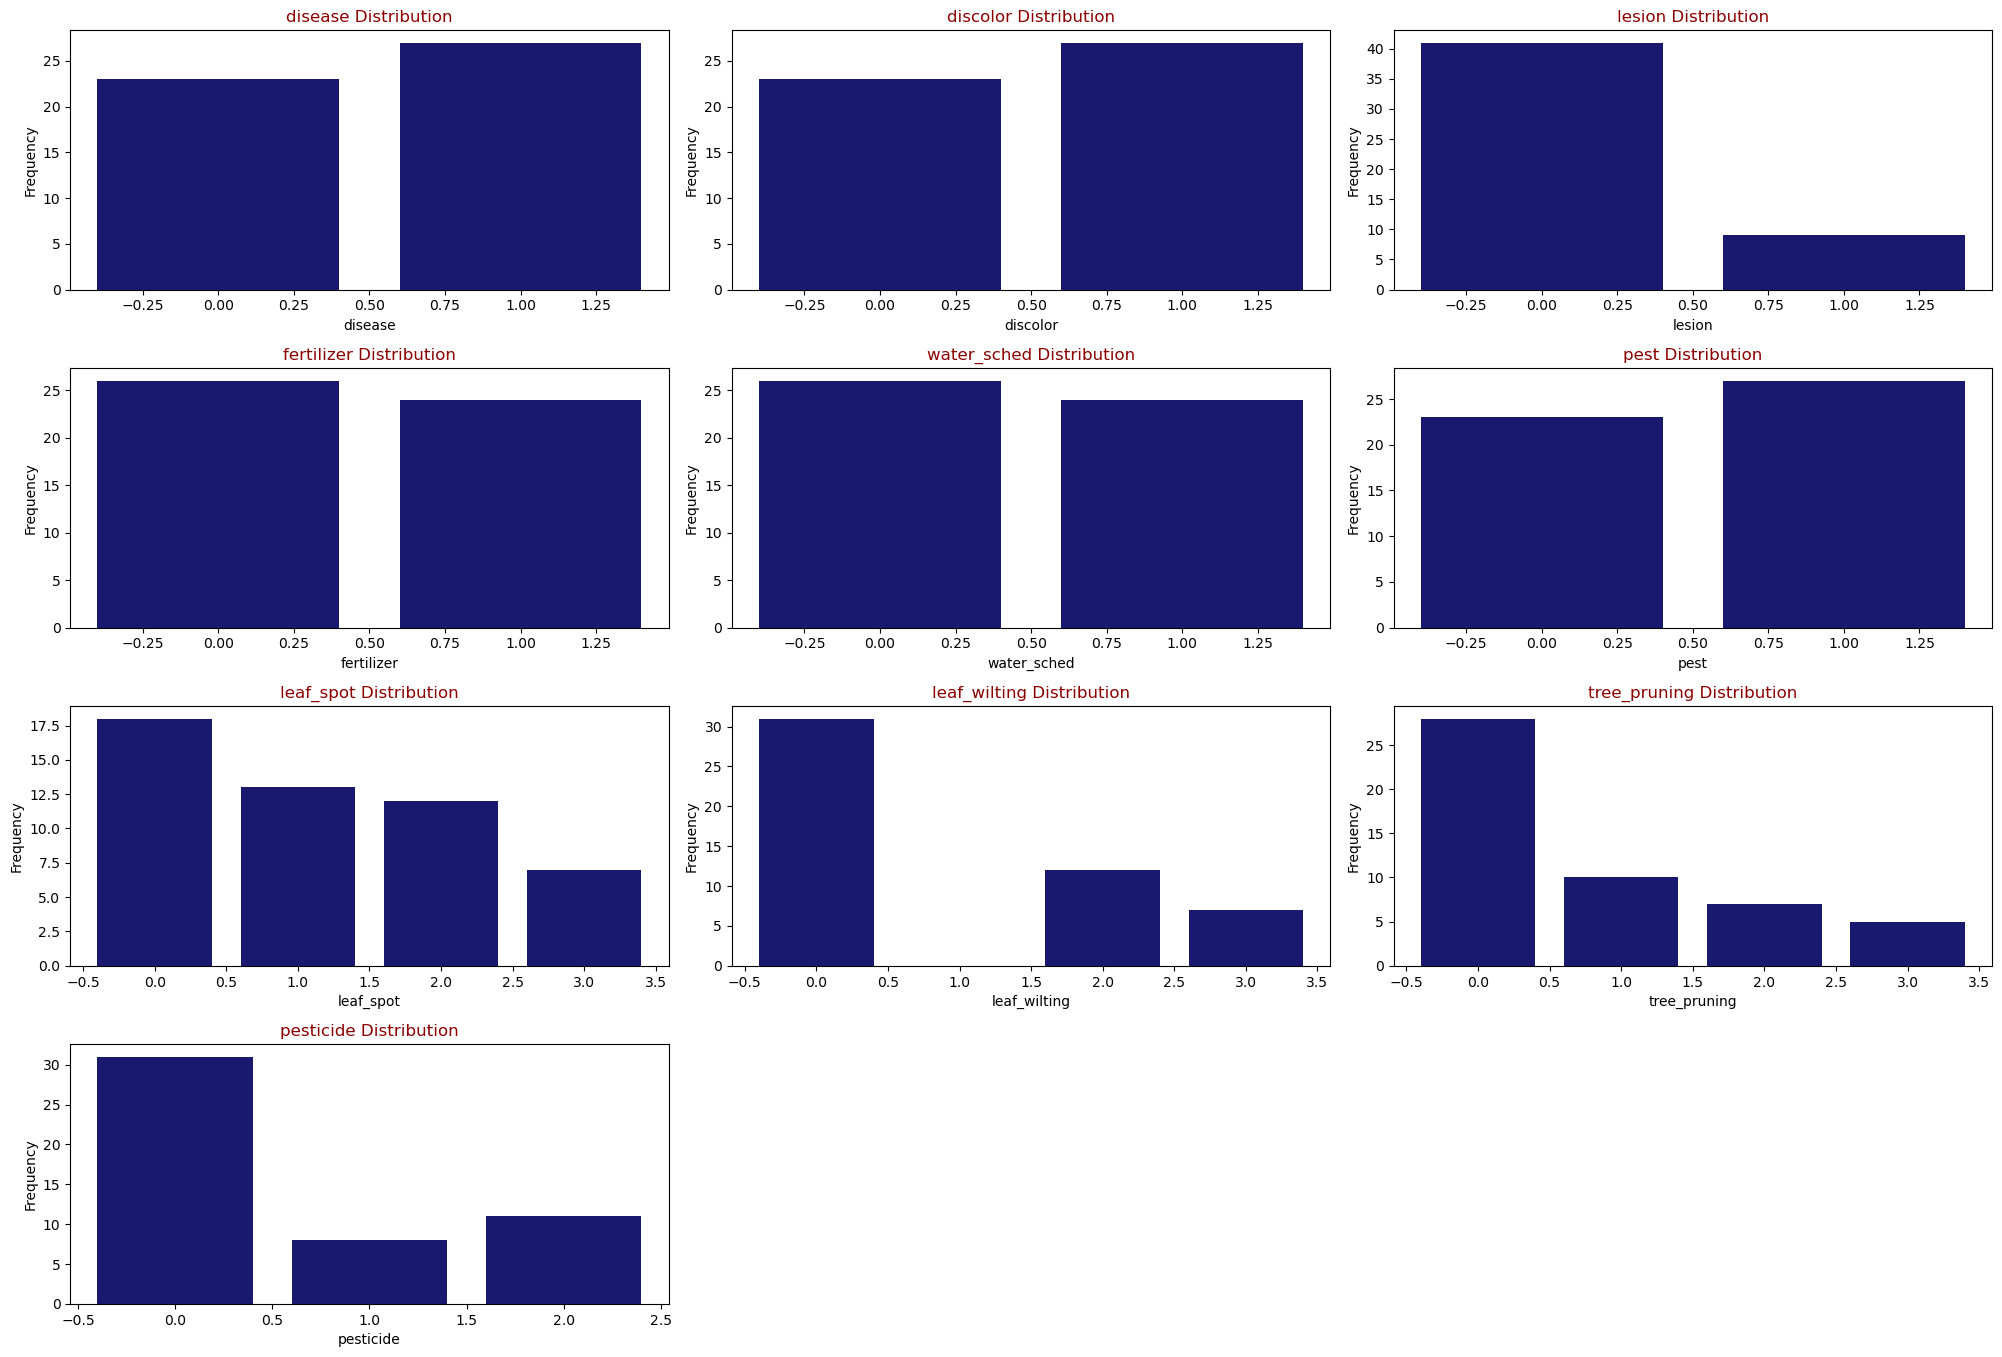

In [48]:
def draw_bar_charts(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        counts = dataframe[feature].value_counts().sort_values(ascending=False)  # Get counts for each value

        # Create the bar chart with appropriate labels and colors
        bars = ax.bar(counts.index, counts.values, color='midnightblue')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.set_title(feature + " Distribution", color='DarkRed')

    fig.tight_layout()
    plt.show()

draw_bar_charts(kalamansi, kalamansi.columns, 6, 3)

In [50]:
kalamansi.disease.value_counts()

disease
1    27
0    23
Name: count, dtype: int64

<Axes: xlabel='disease', ylabel='count'>

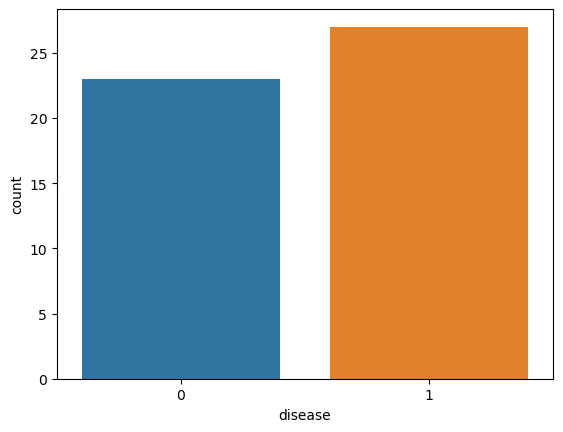

In [51]:
sn.countplot(x = 'disease', data = kalamansi)

There are 27 infected kalamansi and 23 not infected kalamansi.

In [52]:
kalamansi.head()

,disease,discolor,lesion,fertilizer,water_sched,pest,leaf_spot,leaf_wilting,tree_pruning,pesticide
kalamansi_id,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,1,1,0,1,1
2,1,0,0,1,1,1,2,2,0,2
3,0,0,0,0,0,0,0,0,2,0
4,1,1,0,1,1,1,1,0,0,0


### Splitting Data to Train and Test Split

In [86]:
import sklearn
x = kalamansi[['discolor', 'lesion', 'water_sched', 'pest', 'leaf_spot', 'leaf_wilting', 'tree_pruning', 'pesticide']]
y = kalamansi['disease']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 10)

# split the data X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42) 
# X_train: independent/input feature data for training the model 
# y_train: dependent/output feature data for training the model 
# X_test: independent/input feature data for testing the model; will be used to predict the output values 
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model. 
# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set 
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [87]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [88]:
import joblib

joblib.dump(log_reg, 'kalamansi_disease_logreg.pkl')  # Save the MODEL 

['kalamansi_disease_logreg.pkl']

### Prediction

In [89]:
predict = log_reg.predict(x_test)

In [90]:
y_test.values

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [91]:
predict

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

### Model Evaluation

In [92]:
# Model Performance

pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,6,1
Actual Yes,0,8


In [93]:
# Model Accuracy
from sklearn.metrics import accuracy_score

In [94]:
sklearn.metrics.accuracy_score(y_test,predict)

0.9333333333333333

In [95]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      1.00      0.94         8

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



#### Exporting Model

In [85]:
# Load the model from file

loaded_model = joblib.load('kalamansi_disease_logreg.pkl')